### Importing required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Fetching the data

In [4]:
import os

directory_path = r"//Users/akhilkumarkolli/Youtube"
print(os.listdir(directory_path))

['college.csv', '.ipynb_checkpoints', 'UScomments.csv']


In [5]:
path_file = ("/Users/akhilkumarkolli/Youtube/Uscomments.csv")
data = pd.read_csv(path_file, on_bad_lines='skip')

/var/folders/nf/jyh9wrds77jbcj7h60009_nw0000gn/T/ipykernel_44928/1264427927.py:2: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path_file, on_bad_lines='skip')


### Data Preprocessing

In [6]:
data.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [7]:
data.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [8]:
data.dropna(inplace = True)

In [9]:
data.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

### Sentiment Analysis

In [10]:
!pip install textblob

In [11]:
from textblob import TextBlob

In [12]:
data.head(6)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0


In [39]:
polarity = []
for comments in data["comment_text"]:
    try:
        polarity.append( TextBlob(comments).sentiment.polarity)
    except:
        polarity.append(0)
   
                   

In [40]:
data["polarity"] = polarity

In [41]:
data.shape

(691374, 5)

In [42]:
data.head(20)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


In [43]:
filter1 = data['polarity'] == 1


In [44]:
comments_positive = data[filter1]

In [45]:
filter2 = data['polarity'] == -1

In [46]:
comments_negative = data[filter2]

In [47]:
comments_negative.head(5)

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0


### Word Cloud Analysis

In [48]:
!pip install wordcloud

In [49]:
from wordcloud import WordCloud, STOPWORDS

In [50]:
comments_negative['comment_text']

512       BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...
562       Well… The brain surgeon Ben Carson just proved...
952              WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!
1371                                         WTF BRUH!!!!!!
1391                        cheeseus christ thats insane!!!
                                ...                        
690788                                  Like Kelly she evil
690865                       R U FUCKING KIDDING ME?!?!?!?!
691073             This is horribly offensive please report
691180    Sink holes looks terrifying sinkholes sink you...
691224    Trump talked to the president of US Virgin Isl...
Name: comment_text, Length: 3508, dtype: object

In [51]:
positive_comments_collab = ' '.join(comments_positive['comment_text'])

In [52]:
wordcloud = WordCloud(stopwords = set(STOPWORDS)).generate(positive_comments_collab)

(-0.5, 399.5, 199.5, -0.5)

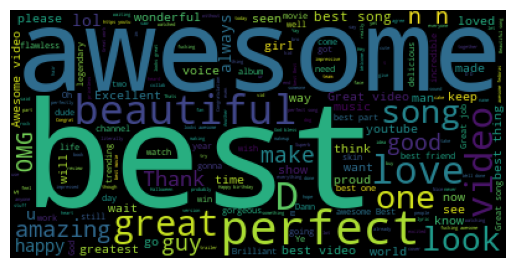

In [53]:
plt.imshow(wordcloud)
plt.axis('off')

### Emoji analysis of YouTube comments

In [54]:
!pip install emoji==2.2.0

In [55]:
import emoji 

In [56]:
data['comment_text'].head(6)

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
5                              #1 on trending AYYEEEEE
Name: comment_text, dtype: object

In [57]:
comment = 'trending 😉'

In [58]:
all_emoji_list =[]
for char in data['comment_text']:
    if char in emoji.EMOJI_DATA:
        all_emoji_list.append(char)
        
print(all_emoji_list)

['👍', '❤️', '😂', '❤️', '💄', '🖤', '💕', '😒', '👎🏽', '🐘', '💕', '😎', '🇺🇸', '🙏', '🇺🇸', '🇺🇸', '🌞', '💜', '😱', '💕', '🎈', '👍', '😕', '😻', '💄', '💦', '❤️', '❤', '😅', '💜', '🤴🏻', '😍', '💯', '❤', '😑', '💖', '❤', '🙏🏽', '♥️', '😂', '❤️', '😭', '💛', '😝', '😍', '❤', '😍', '💝', '👌', '🌞', '✌🏻', '😒', '👎🏽', '😂', '🇺🇸', '🙏', '🇺🇸', '🇺🇸', '💜', '😱', '🎈', '👍', '😴', '👍', '👍', '👍', '❤', '👍', '🔥', '💯', '🐍', '🐍', '😍', '👍', '😂', '👍', '❤', '💩', '😍', '👍', '😍', '💞', '♥️', '😻', '♥', '😂', '😃', '😴', '👍', '👍', '👍', '❤', '👍', '🔥', '💯', '🐍', '🐍', '😍', '👍', '😂', '👍', '❤', '💩', '😍', '👍', '😍', '💞', '♥️', '😻', '♥', '😂', '😃', '👍', '🤘🏾', '👍', '🙄', '😂', '👍', '👍', '🎢', '❤️', '👍🏾', '😂', '😍', '👍', '❤', '❤', '👌', '🤢', '🔥', '❤️', '😍', '🤗', '😢', '👍', '🔥', '👑', '😍', '👍', '💯', '❤', '🐍', '🐍', '💞', '♥️', '😂', '😀', '👌', '😍', '👍', '🤦🏾\u200d♂️', '💋', '👋', '👍', '😂', '❤', '😍', '❤️', '😭', '😍', '❤️', '❤', '💚', '♥', '👍', '🖤', '💚', '❤️', '💿', '❤️', '🥀', '👁', '😀', '😂', '👍', '🇩🇴', '❤', '❣️', '🔥', '🔥', '👑', '❤', '❤', '💛', '👌🏾', '🤢', '👍', '💚', '😍', '❤️', '🔥', '😢',

In [59]:
from collections import Counter

In [60]:
 emojis =[Counter(all_emoji_list).most_common(10)[i][0] for i in range(10)]


In [61]:
freq = [Counter(all_emoji_list).most_common(10)[i][1] for i in range(10)]

In [62]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [63]:
trace = go.Bar(x=emojis , y=freq)

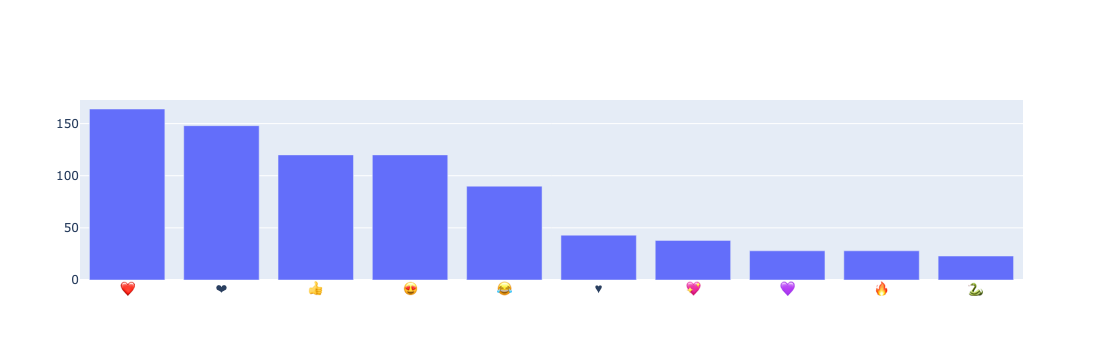

In [64]:
iplot([trace])

### Data collection

In [65]:
import os

In [66]:
files = os.listdir(r"/Users/akhilkumarkolli/additional_data")

In [67]:
files_csv= [file for file in files if ".csv" in file]

In [68]:
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [69]:
full_df = pd.DataFrame()
path = r"/Users/akhilkumarkolli/additional_data"

for file in files_csv:
    current_df = pd.read_csv(path+ '/'+file,encoding = "iso-8859-1" )
    full_df = pd.concat([full_df,current_df], ignore_index = True)

In [70]:
full_df.shape

(375942, 16)

### Data Preprocessing

In [71]:
full_df[full_df.duplicated()].shape

(36417, 16)

In [72]:
full_df = full_df.drop_duplicates()

In [73]:
full_df.shape

(339525, 16)

In [46]:
full_df[0:1000].to_csv("/Users/akhilkumarkolli/collated_data.csv", index = False)

In [74]:
!pip install mysql-connector-python
from sqlalchemy import create_engine
import urllib.parse


In [75]:
#connection_string = f'mysql+mysqlconnector://{username}:{encoded_password}@{host}:{port}/{database}'


In [77]:
#engine = create_engine(connection_string)

In [79]:
#full_df[0:100].to_sql('users', con=engine, if_exists ='append')

### Analysing the most liked category in Youtube

In [80]:
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...


In [81]:
full_df['category_id'].unique()

array([24, 22, 25, 26, 10, 23, 17,  2,  1, 29, 27, 28, 20, 15, 19, 43, 30,
       44])

In [82]:
json_df = pd.read_json(r'/Users/akhilkumarkolli/additional_data/US_category_id.json')

In [83]:
json_df["items"][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [84]:
cat_dic = {}

for item in json_df["items"]:
    cat_dic[int(item["id"])] = item['snippet']['title']

In [85]:
cat_dic

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [86]:
full_df["category_name"]=full_df["category_id"].map(cat_dic)

In [87]:
full_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,Entertainment
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,People & Blogs
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,News & Politics
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,News & Politics
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,Howto & Style
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375937,l884wKofd54,18.14.06,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,EnriqueIglesiasVEVO,10,2018-05-09T07:00:01.000Z,"Enrique Iglesias feat. Pitbull|""MOVE TO MIAMI""...",25066952,268088,12783,9933,https://i.ytimg.com/vi/l884wKofd54/default.jpg,False,False,False,NEW SONG - MOVE TO MIAMI feat. Pitbull (Click ...,Music
375938,IP8k2xkhOdI,18.14.06,Jacob Sartorius - Up With It (Official Music V...,Jacob Sartorius,10,2018-05-11T17:09:16.000Z,"jacob sartorius|""jacob""|""up with it""|""jacob sa...",1492219,61998,13781,24330,https://i.ytimg.com/vi/IP8k2xkhOdI/default.jpg,False,False,False,THE OFFICIAL UP WITH IT MUSIC VIDEO!Get my new...,Music
375939,Il-an3K9pjg,18.14.06,Anne-Marie - 2002 [Official Video],Anne-Marie,10,2018-05-08T11:05:08.000Z,"anne|""marie""|""anne-marie""|""2002""|""two thousand...",29641412,394830,8892,19988,https://i.ytimg.com/vi/Il-an3K9pjg/default.jpg,False,False,False,Get 2002 by Anne-Marie HERE â¶ http://ad.gt/2...,Music
375940,-DRsfNObKIQ,18.14.06,Eleni Foureira - Fuego - Cyprus - LIVE - First...,Eurovision Song Contest,24,2018-05-08T20:32:32.000Z,"Eurovision Song Contest|""2018""|""Lisbon""|""Cypru...",14317515,151870,45875,26766,https://i.ytimg.com/vi/-DRsfNObKIQ/default.jpg,False,False,False,Eleni Foureira represented Cyprus at the first...,Entertainment


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Entertainment'),
  Text(1, 0, 'People & Blogs'),
  Text(2, 0, 'News & Politics'),
  Text(3, 0, 'Howto & Style'),
  Text(4, 0, 'Music'),
  Text(5, 0, 'Comedy'),
  Text(6, 0, 'Sports'),
  Text(7, 0, 'Autos & Vehicles'),
  Text(8, 0, 'Film & Animation'),
  Text(9, 0, 'Nonprofits & Activism'),
  Text(10, 0, 'Education'),
  Text(11, 0, 'Science & Technology'),
  Text(12, 0, 'Gaming'),
  Text(13, 0, 'Pets & Animals'),
  Text(14, 0, 'Travel & Events'),
  Text(15, 0, 'Shows'),
  Text(16, 0, 'Movies'),
  Text(17, 0, 'Trailers')])

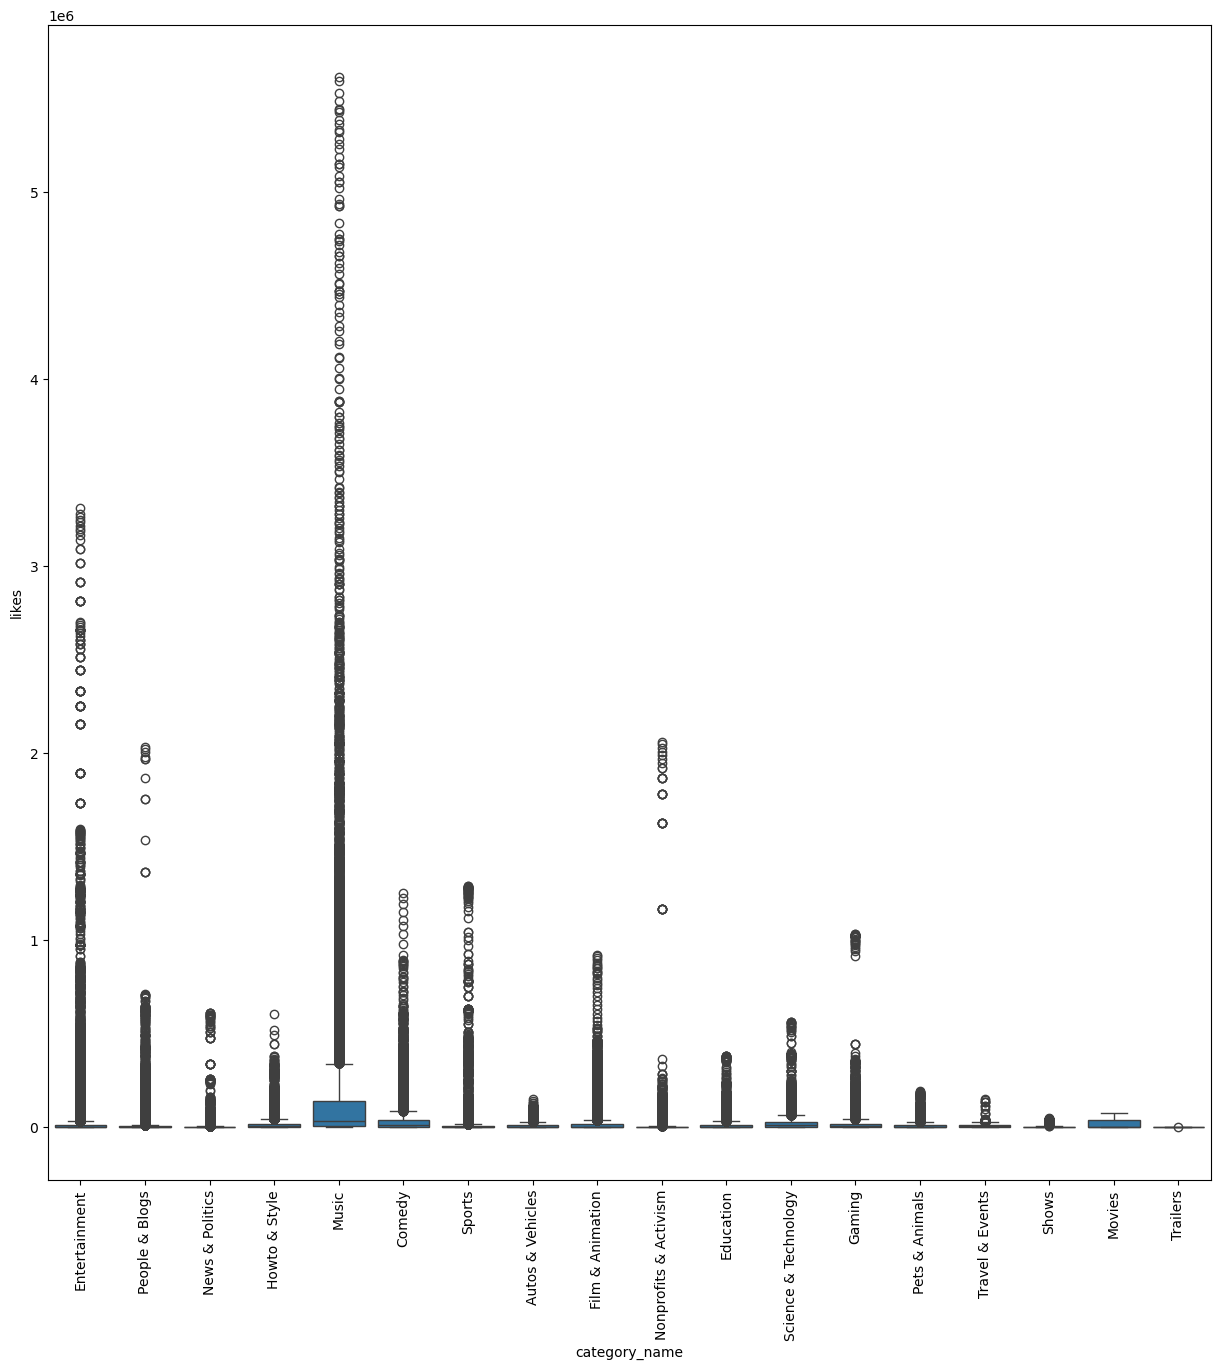

In [88]:
plt.figure(figsize=(15,15))
sns.boxplot(x = 'category_name', y= "likes", data= full_df)
plt.xticks(rotation = "vertical")

In [89]:
most_liked_category = full_df.loc[full_df['likes'].idxmax(), 'category_name']

In [90]:
most_liked_category

'Music'

### Engagement of audience

In [91]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name'],
      dtype='object')

In [92]:
full_df['like_rate']=(full_df['likes']/full_df['views'])*100
full_df['dislike_rate']=(full_df['dislikes']/full_df['views'])*100
full_df['comments_count_rate']=(full_df['comment_count']/full_df['views'])*100

In [93]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comments_count_rate'],
      dtype='object')

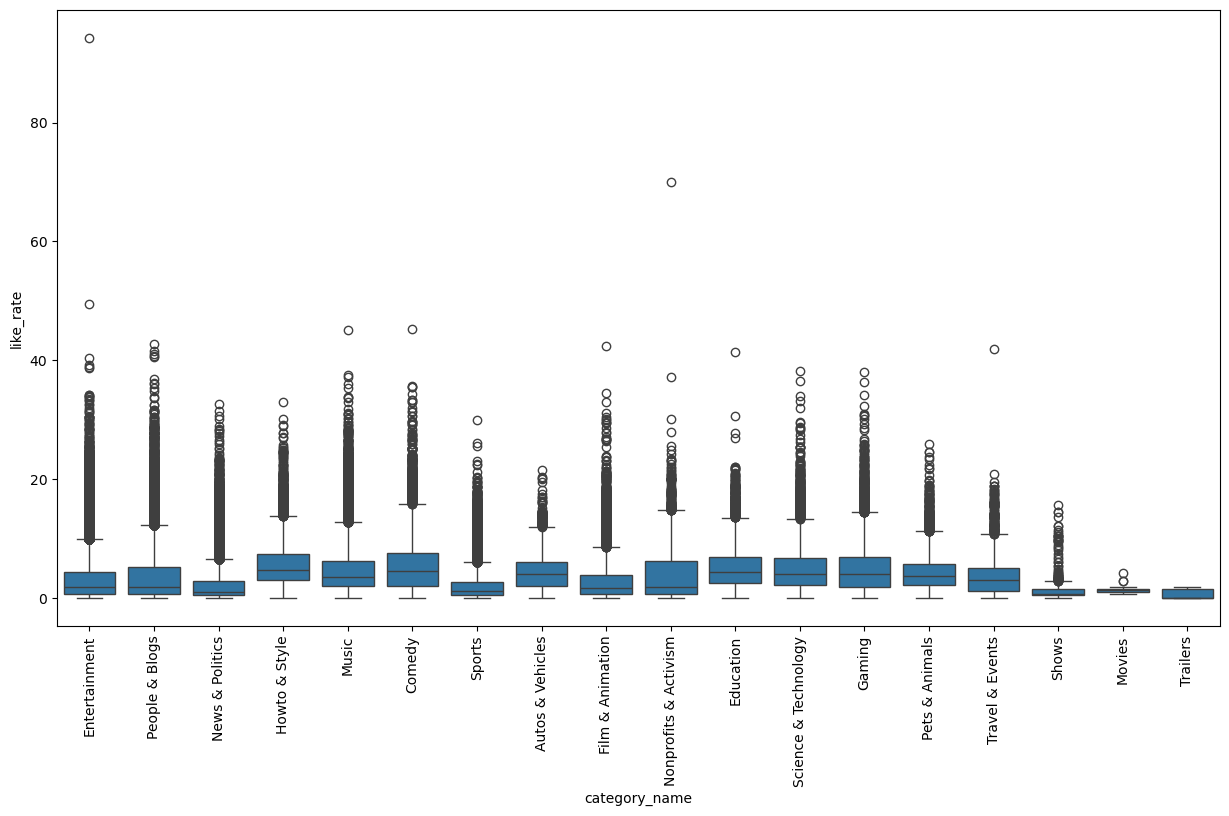

In [99]:
plt.figure(figsize=(15,8))
sns.boxplot(x = "category_name", y= "like_rate", data= full_df)
plt.xticks(rotation = "vertical")
plt.show()

<Axes: xlabel='views', ylabel='likes'>

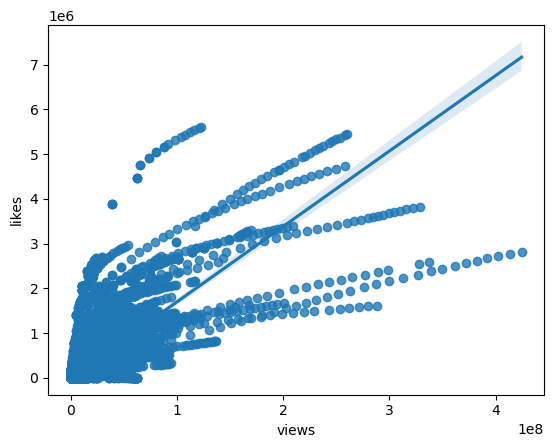

In [100]:
sns.regplot(x='views',y='likes', data = full_df)

In [101]:
full_df[['views','likes','dislikes']].corr()

,views,likes,dislikes
views,1.000000,0.779531,0.405428
likes,0.779531,1.000000,0.451809
dislikes,0.405428,0.451809,1.000000


<Axes: >

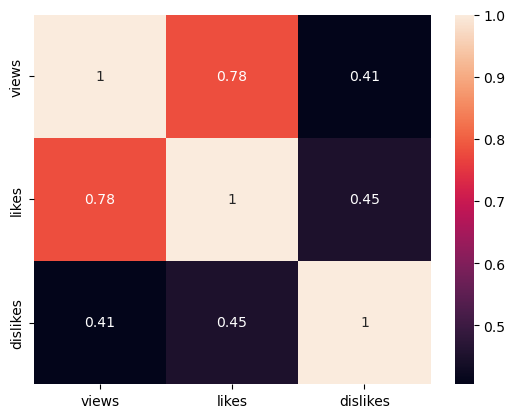

In [102]:
sns.heatmap(full_df[['views','likes','dislikes']].corr(), annot = True)

### Channel with largest number of trending videos in YouTube Community

In [103]:
full_df.head(6)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comments_count_rate
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,Entertainment,1.348467,0.116403,0.592010
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,People & Blogs,0.258164,0.165758,0.351522
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,News & Politics,7.426652,0.195496,0.446114
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,News & Politics,0.393123,0.177842,0.216322
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,Howto & Style,11.557009,0.136210,1.485704
5,Q9kK6NWZR1U,17.14.11,Asi se sintio Terremoto en iraq al bordo de ir...,MÃSICA & ENTRETENIMIENTO,10,2017-11-12T20:17:38.000Z,[none],129645,506,67,239,https://i.ytimg.com/vi/Q9kK6NWZR1U/default.jpg,False,False,False,Un fuerte sismo ha afectado en la noche de est...,Music,0.390297,0.051680,0.184350


In [106]:
full_df['channel_title'].value_counts()

channel_title
The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
ABIZ ENT BUZZ                           1
JENNYMOMENT                             1
Drache Offiziell                        1
Jules                                   1
The Chainsmokers                        1
Name: count, Length: 37824, dtype: int64

### Using GROUPBY

In [111]:
full_df.groupby(['channel_title']).size().sort_values(ascending = False)

channel_title
The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
Kd Malts                                1
Zedan TV                                1
Kc Kelly - Rocketprenuer                1
Kbaby                                   1
Pavel Sidorik TV                        1
Length: 37824, dtype: int64

In [121]:
cdf = full_df.groupby(['channel_title']).size().sort_values(ascending = False).reset_index()

In [122]:
cdf = cdf.rename(columns={0: "total_videos"})

In [124]:
top_channels = cdf[0:5]

In [125]:
top_channels

,channel_title,total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528


In [130]:
import plotly.express as px

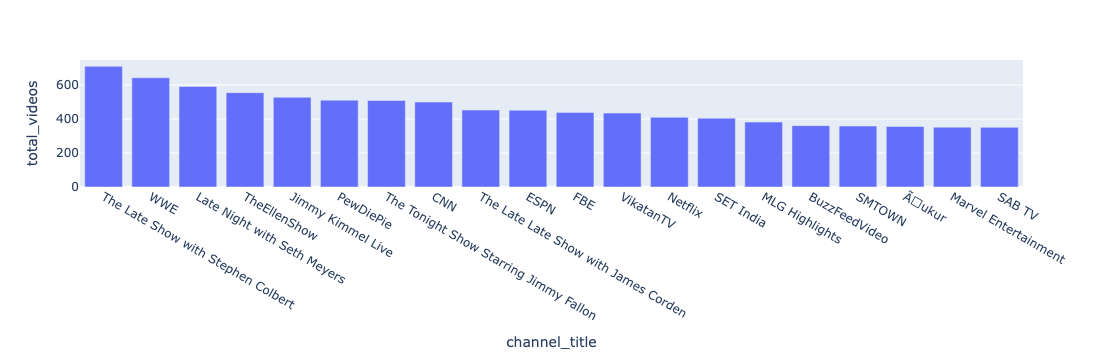

In [134]:
px.bar(data_frame = cdf[0:20], x ="channel_title",y="total_videos")

### Establishing the correlation between punctuations , views, likes, dislikes in YouTube Community

In [135]:
import string 

In [139]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [142]:
len([char for char in full_df['title'][0] if char in string.punctuation])

1

In [141]:
full_df['title'][0]

'CapÃ\xadtulo 12 | MasterChef 2017'

### Taking sample Data (splitting data)

In [158]:
sample_df = full_df[0:10000]

In [159]:
def punc_count(text):
    return len([char for char in text if char in string.punctuation])

In [160]:
sample_df['title'].apply(punc_count)

0       1
1       3
2       1
3       1
4       1
       ..
9995    2
9996    3
9997    1
9998    1
9999    0
Name: title, Length: 10000, dtype: int64

In [161]:
sample_df['punc_count'] = sample_df['title'].apply(punc_count)

In [162]:
sample_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comments_count_rate,punc_count
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,...,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,Entertainment,1.348467,0.116403,0.592010,1
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,...,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,People & Blogs,0.258164,0.165758,0.351522,3
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,...,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,News & Politics,7.426652,0.195496,0.446114,1
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,...,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,News & Politics,0.393123,0.177842,0.216322,1
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,...,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,Howto & Style,11.557009,0.136210,1.485704,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,VoTfkFkp3TM,18.03.01,ROMMEL PACHECO SE VA DE EXATLON (GIOVANNI CR),Giovanni CR,17,2018-01-03T03:49:58.000Z,[none],26187,189,52,...,https://i.ytimg.com/vi/VoTfkFkp3TM/default.jpg,False,False,False,Dale like y suscribete â¤ð,Sports,0.721732,0.198572,0.481155,2
9996,vuGi2RmYhas,18.03.01,ð¤SI TE RÃES PIERDES NIVEL DIOS ð´(818% I...,THE YOLO,23,2018-01-03T00:59:22.000Z,"si te rÃ­es pierdes nivel dios|""si te rÃ­es pi...",370656,31806,1140,...,https://i.ytimg.com/vi/vuGi2RmYhas/default.jpg,False,False,False,ð¤ SUSCRIBETE PARA MAS VÃDEOS ð½\n\n\nâ ...,Comedy,8.581002,0.307563,1.377288,3
9997,3j-sm6gBuvw,18.03.01,Â¡Top 10 Muertes SATISFACTORIAS de Villanos de...,WatchMojo EspaÃ±ol,1,2018-01-02T18:00:32.000Z,"top 10|""lista""|""top 5""|""disney""|""pelÃ­culas de...",368661,16764,307,...,https://i.ytimg.com/vi/3j-sm6gBuvw/default.jpg,False,False,False,Â¡Top 10 Muertes SATISFACTORIAS de Villanos de...,Film & Animation,4.547267,0.083274,0.403894,1
9998,f_a3tmkTSzk,18.03.01,Logan Paul Finds Something In The Woods !,FritangaPlays,20,2018-01-02T09:59:24.000Z,"logan paul|""japanese forest""|""suicide forest""|...",643907,5604,9068,...,https://i.ytimg.com/vi/f_a3tmkTSzk/default.jpg,False,False,False,this is a S**t post.\n\n______________________...,Gaming,0.870312,1.408278,0.131541,1


<Axes: xlabel='punc_count', ylabel='views'>

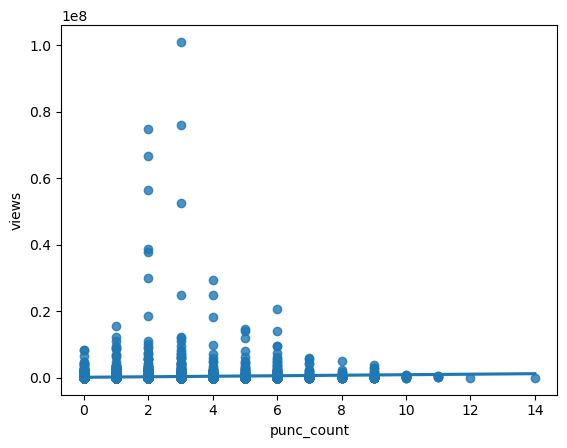

In [163]:
sns.regplot(x='punc_count',y='views', data = sample_df)

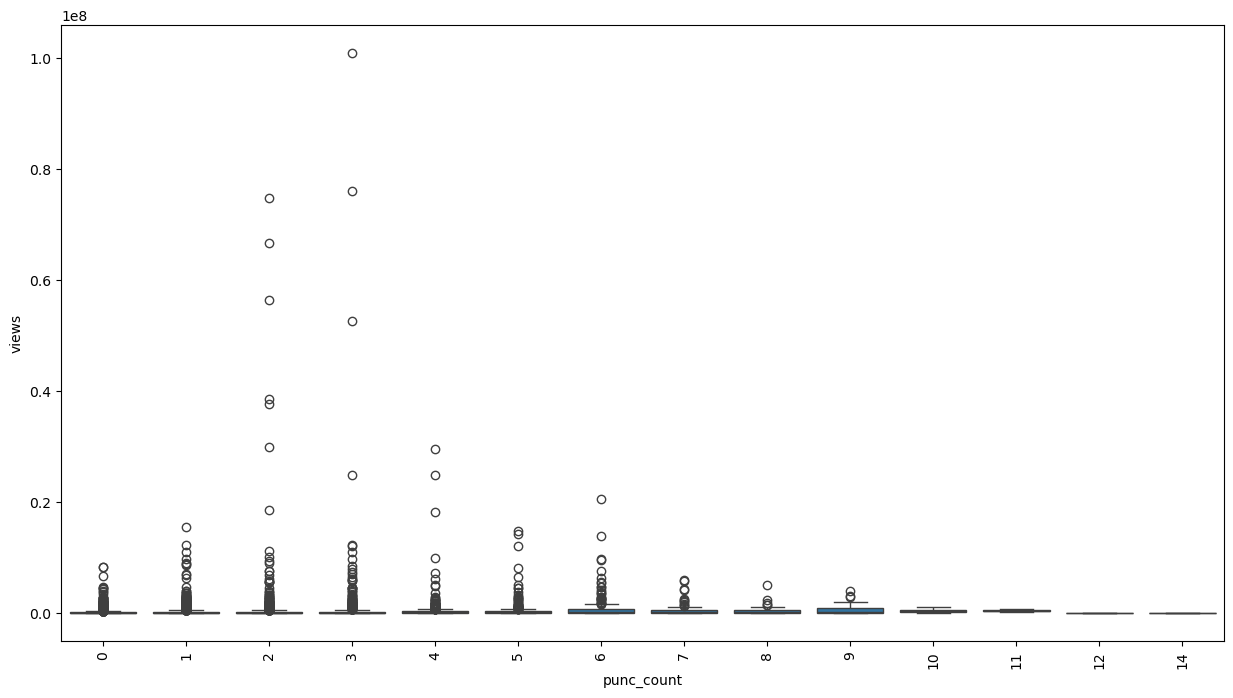

In [164]:
plt.figure(figsize=(15,8))
sns.boxplot(x = "punc_count", y= "views", data= sample_df)
plt.xticks(rotation = "vertical")
plt.show()

# Conclusion: It is clearly evident that if the punctuations in a title are lying in b/w two or three the views are more.